In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
import string
import plotly.express as px
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading file
data = pd.read_csv("D:/Twitter Sentiments.csv")

In [3]:
# dimensions
data.shape

(31962, 3)

In [4]:
data.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [5]:
# descriptive analysis
data.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [6]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [7]:
# Class is Imbalanced
data['label'].value_counts().plot(kind='bar',figsize=(3,2))
plt.show()

As we see above we have imbalanced class

In [8]:
print(data['tweet'][0])
print('_'*120)
print(data['tweet'][1])
print('_'*120)
print(data['tweet'][2])
print('_'*120)
print(data['tweet'][3])
print('_'*120)
print(data['tweet'][4])


 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
________________________________________________________________________________________________________________________
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
________________________________________________________________________________________________________________________
  bihday your majesty
________________________________________________________________________________________________________________________
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
________________________________________________________________________________________________________________________
 factsguide: society now    #motivation


In [9]:
# count of all words in review

def no_of_wod(text):
    words = text.split()
    word_count = len(words)
    return word_count

data['counts_of_words'] = data['tweet'].apply(no_of_wod)

In [10]:
data.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

   counts_of_words  
0               18  
1               19  
2                3  
3               14  
4                4

In [11]:
data.isnull().sum()

id                 0
label              0
tweet              0
counts_of_words    0
dtype: int64

In [12]:
# Dropping "id" column
data.drop(columns='id',axis=1,inplace=True)

## Text PreProcessing

In [13]:
# Step1. lowercasing 
data['tweet'] = data['tweet'].str.lower()

In [14]:
# Step2. Removing HTML taggs
import re
def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub(r' ',str(text))

data['preprocessed_text'] = data['tweet'].apply(remove_html_tags)

In [15]:
data.head()

label                                              tweet  counts_of_words  \
0      0   @user when a father is dysfunctional and is s...               18   
1      0  @user @user thanks for #lyft credit i can't us...               19   
2      0                                bihday your majesty                3   
3      0  #model   i love u take with u all the time in ...               14   
4      0             factsguide: society now    #motivation                4   

                                   preprocessed_text  
0   @user when a father is dysfunctional and is s...  
1  @user @user thanks for #lyft credit i can't us...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

In [16]:
# Step 3. Removing Symbols and Emoji
from emoji import demojize

data['preprocessed_text'] = data['preprocessed_text'].str.replace("[^a-zA-Z#]", " ")

data['preprocessed_text']=data['preprocessed_text'].apply(demojize)
data.head()

label                                              tweet  counts_of_words  \
0      0   @user when a father is dysfunctional and is s...               18   
1      0  @user @user thanks for #lyft credit i can't us...               19   
2      0                                bihday your majesty                3   
3      0  #model   i love u take with u all the time in ...               14   
4      0             factsguide: society now    #motivation                4   

                                   preprocessed_text  
0    user when a father is dysfunctional and is s...  
1   user  user thanks for #lyft credit i can t us...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide  society now    #motivation

In [17]:
data.tail()

label                                              tweet  \
31957      0  ate @user isz that youuu?ðððððð...   
31958      0    to see nina turner on the airwaves trying to...   
31959      0  listening to sad songs on a monday morning otw...   
31960      1  @user #sikh #temple vandalised in in #calgary,...   
31961      0                   thank you @user for you follow     

       counts_of_words                                  preprocessed_text  
31957                5  ate  user isz that youuu                      ...  
31958               23    to see nina turner on the airwaves trying to...  
31959               13  listening to sad songs on a monday morning otw...  
31960               10   user #sikh #temple vandalised in in #calgary ...  
31961                6                   thank you  user for you follow

In [18]:
# Step 4. removing punctuations
import string
exclude = string.punctuation

In [19]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

data['preprocessed_text'] = data['preprocessed_text'].apply(remove_punc1)

In [20]:
data.head()

label                                              tweet  counts_of_words  \
0      0   @user when a father is dysfunctional and is s...               18   
1      0  @user @user thanks for #lyft credit i can't us...               19   
2      0                                bihday your majesty                3   
3      0  #model   i love u take with u all the time in ...               14   
4      0             factsguide: society now    #motivation                4   

                                   preprocessed_text  
0    user when a father is dysfunctional and is s...  
1   user  user thanks for lyft credit i can t use...  
2                                bihday your majesty  
3  model   i love u take with u all the time in u...  
4              factsguide  society now    motivation

In [21]:
# Step 5.removing "user" word from tweet
def remove_username(text):
    cleaned_string = re.sub(r"user", ' ', text)
    return cleaned_string

In [22]:
data['preprocessed_text'] = data['preprocessed_text'].apply(remove_username)

In [23]:
data.head()

label                                              tweet  counts_of_words  \
0      0   @user when a father is dysfunctional and is s...               18   
1      0  @user @user thanks for #lyft credit i can't us...               19   
2      0                                bihday your majesty                3   
3      0  #model   i love u take with u all the time in ...               14   
4      0             factsguide: society now    #motivation                4   

                                   preprocessed_text  
0      when a father is dysfunctional and is so s...  
1        thanks for lyft credit i can t use cause...  
2                                bihday your majesty  
3  model   i love u take with u all the time in u...  
4              factsguide  society now    motivation

In [24]:
# Step 6. Removing Stopwords

from nltk.corpus import stopwords


# from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopwords(text):
    text=[word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

In [25]:
data['preprocessed_text'] = data['preprocessed_text'].apply(remove_stopwords)

In [26]:
data.head()

label                                              tweet  counts_of_words  \
0      0   @user when a father is dysfunctional and is s...               18   
1      0  @user @user thanks for #lyft credit i can't us...               19   
2      0                                bihday your majesty                3   
3      0  #model   i love u take with u all the time in ...               14   
4      0             factsguide: society now    #motivation                4   

                                   preprocessed_text  
0  father dysfunctional selfish drags kids dysfun...  
1  thanks lyft credit use cause offer wheelchair ...  
2                                     bihday majesty  
3                        model love u take u time ur  
4                      factsguide society motivation

In [27]:
# Step 7. Stemming

from nltk.stem import SnowballStemmer
def Stemming(text):
    stem=[]
    stopword = stopwords.words('english')
    snowball_stemmer = SnowballStemmer('english')
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
    stem=' '.join(stemmed_word)
    return stem


In [28]:
data['preprocessed_text'] = data['preprocessed_text'].apply(Stemming)

In [29]:
# Again Checking Total words
data['counts_of_words'] = data['preprocessed_text'].apply(no_of_wod)

In [30]:
data.tail(20)

label                                              tweet  \
31942      0  this week is flying by   #humpday - #wednesday...   
31943      0   @user modeling photoshoot this friday yay #mo...   
31944      0  you're surrounded by people who love you (even...   
31945      0  feel like... ðð¶ð #dog #summer #hot #h...   
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...   
31947      1  @user @user you don't have the balls to hashta...   
31948      1   makes you ask yourself, who am i? then am i a...   
31949      0  hear one of my new songs! don't go - katie ell...   
31950      0   @user you can try to 'tail' us to stop, 'butt...   
31951      0  i've just posted a new blog: #secondlife #lone...   
31952      0                @user you went too far with @user     
31953      0  good morning #instagram #shower #water #berlin...   
31954      0  #holiday   bull up: you will dominate your bul...   
31955      0  less than 2 weeks ð
ðð¼ð¹ððµ @us...   
31956      0  off fishing tomorrow @user carnt wait first ti...   
31957      0  ate @user isz that youuu?ðððððð...   
31958      0    to see nina turner on the airwaves trying to...   
31959      0  listening to sad songs on a monday morning otw...   
31960      1  @user #sikh #temple vandalised in in #calgary,...   
31961      0                   thank you @user for you follow     

       counts_of_words                                  preprocessed_text  
31942                6               week fli humpday wednesday kamp ucsd  
31943                7       model photoshoot friday yay model follow emo  
31944                7           surround peopl love even deserv yet hate  
31945                8              feel like dog summer hot help sun day  
31946                6   omfg offend mailbox proud mailboxprid liberalism  
31947                8    ball hashtag say weasel away lumpi toni dipshit  
31948                7                  make ask anybodi god oh thank god  
31949               13  hear one new song go kati elli youtub origin m...  
31950                9  tri tail us stop butt good time goldenretriev ...  
31951                6                  post new blog secondlif lone neko  
31952                2                                           went far  
31953               13  good morn instagram shower water berlin berlin...  
31954                7         holiday bull domin bull direct whatev want  
31955                3       less week ibizabringitonmallorcaholidayssumm  
31956                7           fish tomorrow carnt wait first time year  
31957                3                                      ate isz youuu  
31958               14  see nina turner airwav tri wrap mantl genuin h...  
31959                8           listen sad song monday morn otw work sad  
31960                7        sikh templ vandalis calgari wso condemn act  
31961                2                                       thank follow

In [31]:
data[['preprocessed_text']].head(20)

preprocessed_text
0       father dysfunct selfish drag kid dysfunct run
1   thank lyft credit use caus offer wheelchair va...
2                                      bihday majesti
3                         model love u take u time ur
4                             factsguid societi motiv
5   huge fan fare big talk leav chao pay disput ge...
6                                 camp tomorrow danni
7   next school year year exam think school exam h...
8   love land allin cav champion cleveland clevela...
9                                           welcom gr
10  ireland consum price index mom climb previous ...
11  selfish orlando standwithorlando pulseshoot or...
12                   get see daddi today day gettingf
13  cnn call michigan middl school build wall chan...
14  comment australia opkillingbay seashepherd hel...
15           ouch junior angri got junior yugyoem omg
16                            thank paner thank posit
17                                       retweet agre
18        friday smile around via ig cooki make peopl
19                       know essenti oil made chemic

In [32]:
from wordcloud import WordCloud

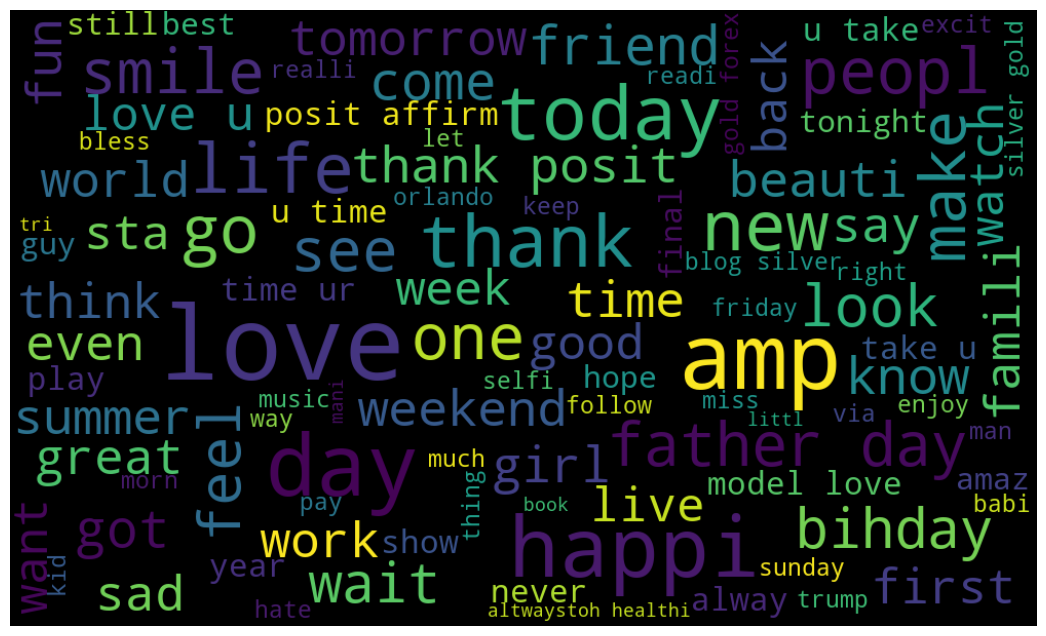

In [33]:
# Number of overall words repeated in corpus 

txt = ' '.join(rev for rev in data['preprocessed_text'])
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [34]:
from collections import Counter
count = Counter()
for i in data['preprocessed_text'].values:
    for j in i.split():
        count[j] += 1

# Checking 20 most frequent words        
count.most_common(20)

[('love', 3178),
 ('day', 2898),
 ('happi', 2101),
 ('amp', 1778),
 ('thank', 1578),
 ('time', 1261),
 ('get', 1261),
 ('like', 1228),
 ('u', 1192),
 ('life', 1161),
 ('go', 1159),
 ('today', 1101),
 ('new', 998),
 ('posit', 992),
 ('make', 992),
 ('father', 954),
 ('smile', 906),
 ('peopl', 895),
 ('bihday', 881),
 ('good', 879)]

In [35]:
# Creating a Dataframe
all_words = pd.DataFrame(count.most_common(20))
all_words.columns = ['word','count']
all_words.head()

word  count
0   love   3178
1    day   2898
2  happi   2101
3    amp   1778
4  thank   1578

In [36]:
px.bar(all_words, x='count', y='word', title='Most Occured Words in Positive Reviews', color = 'word')

In [37]:
# Number of positive words in Corpus
pos_review = data[data['label']==0]
pos_review.head()

label                                              tweet  counts_of_words  \
0      0   @user when a father is dysfunctional and is s...                7   
1      0  @user @user thanks for #lyft credit i can't us...               11   
2      0                                bihday your majesty                2   
3      0  #model   i love u take with u all the time in ...                7   
4      0             factsguide: society now    #motivation                3   

                                   preprocessed_text  
0      father dysfunct selfish drag kid dysfunct run  
1  thank lyft credit use caus offer wheelchair va...  
2                                     bihday majesti  
3                        model love u take u time ur  
4                            factsguid societi motiv

In [38]:
text = ' '.join([i for i in pos_review['preprocessed_text']])
plt.figure(figsize=(20,15), facecolor='None')
word_cloud = WordCloud(max_words=500, width=1600 ,height=800).generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Occured words in Positive Reviews',fontsize = 19)
plt.show()

In [39]:
from collections import Counter
count = Counter()
for i in pos_review['preprocessed_text'].values:
    for j in i.split():
        count[j] += 1

# 20 most frequent positive words         
count.most_common(20)

[('love', 3142),
 ('day', 2882),
 ('happi', 2089),
 ('thank', 1535),
 ('amp', 1478),
 ('time', 1229),
 ('get', 1208),
 ('u', 1162),
 ('life', 1154),
 ('go', 1114),
 ('today', 1084),
 ('like', 1084),
 ('posit', 988),
 ('make', 949),
 ('father', 948),
 ('new', 926),
 ('smile', 904),
 ('bihday', 881),
 ('good', 845),
 ('see', 841)]

In [40]:
# Creating dataframe for positive words
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word','count']
pos_words.head()

word  count
0   love   3142
1    day   2882
2  happi   2089
3  thank   1535
4    amp   1478

In [41]:
px.bar(pos_words, x='count', y='word', title='Most Occured Words in Positive Reviews', color = 'word')

In [42]:
# Number of negative words in corpus
neg_review = data[data['label']==1]
neg_review.head()

label                                              tweet  counts_of_words  \
13      1  @user #cnn calls #michigan middle school 'buil...                9   
14      1  no comment!  in #australia   #opkillingbay #se...                7   
17      1                             retweet if you agree!                 2   
23      1    @user @user lumpy says i am a . prove it lumpy.                4   
34      1  it's unbelievable that in the 21st century we'...                8   

                                    preprocessed_text  
13  cnn call michigan middl school build wall chan...  
14  comment australia opkillingbay seashepherd hel...  
17                                       retweet agre  
23                              lumpi say prove lumpi  
34  unbeliev st centuri need someth like neverump ...

In [43]:
text = ' '.join([i for i in neg_review['preprocessed_text']])
plt.figure(figsize=(20,15), facecolor='None')
word_cloud = WordCloud(max_words=500, width=1600 ,height=800).generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Occured words in Negative Reviews',fontsize = 19)
plt.show()

In [44]:
count = Counter()
for i in neg_review['preprocessed_text'].values:
    for j in i.split():
        count[j] += 1
        
#20 most frequent negative words        
count.most_common(20)

[('amp', 300),
 ('trump', 217),
 ('white', 159),
 ('libtard', 150),
 ('black', 149),
 ('like', 144),
 ('racist', 113),
 ('polit', 101),
 ('peopl', 95),
 ('liber', 93),
 ('hate', 92),
 ('allahsoil', 92),
 ('obama', 83),
 ('say', 79),
 ('women', 79),
 ('might', 77),
 ('sjw', 74),
 ('new', 72),
 ('retweet', 68),
 ('racism', 66)]

In [45]:
# Creating dataframe for negative words
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word','count']
neg_words.head()

word  count
0      amp    300
1    trump    217
2    white    159
3  libtard    150
4    black    149

In [46]:
px.bar(neg_words, x='count', y='word', title='Most Occured Words in Positive Reviews', color = 'word')

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Train-Test Splitting
x = data['preprocessed_text'].values
y = data['label']

# TFIDF 

Its is required to convert the corpus into meanigful sum of numbers .
TFIDF vectorizer performs well text preprocessing than count vectorizer .

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
Vector = TfidfVectorizer()
Vector.fit(x)
x = Vector.transform(x)

In [51]:
print(x.shape)

(31962, 31594)


Now we have 31594 unique words

In [52]:
print(Vector.get_feature_names())

['aa', 'aaa', 'aaaaa', 'aaaaaand', 'aaaaah', 'aaaaand', 'aaahh', 'aaahhhh', 'aaahhhhh', 'aaand', 'aaawwwww', 'aaberg', 'aadityaji', 'aah', 'aakhri', 'aal', 'aalivyahsimon', 'aaliyah', 'aamaadmipay', 'aameer', 'aamirkhan', 'aand', 'aap', 'aapi', 'aaptard', 'aarakshan', 'aarhus', 'aaron', 'aaronorenta', 'aaronrhod', 'aarya', 'aaryn', 'aascf', 'aayat', 'ab', 'aba', 'abandon', 'abantu', 'abasel', 'abba', 'abbey', 'abbi', 'abbibucket', 'abbotabad', 'abbott', 'abbu', 'abbyybell', 'abc', 'abcdiscov', 'abd', 'abdomin', 'abduct', 'abe', 'abella', 'abenom', 'aberdeen', 'aberr', 'aberystwyth', 'abet', 'abg', 'abglp', 'abhi', 'abhishek', 'abi', 'abid', 'abil', 'abitur', 'abject', 'abk', 'abl', 'ableg', 'ableism', 'ablond', 'abndp', 'abo', 'aboion', 'abomin', 'abou', 'aboutlastnight', 'aboutmynextmov', 'abouttim', 'abpoli', 'abraham', 'abrahamhick', 'abrandnewday', 'abrazo', 'abricotin', 'abroad', 'absenc', 'absolut', 'absorb', 'abstract', 'abstracta', 'abstractaist', 'abstractpaint', 'absurd', 'ab

In [53]:
print(len(x.toarray()))

31962


In [54]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [55]:
print(x_train.shape)
print('*'*20)
print(x_test.shape)
print('*'*20)
print(y_train.shape)
print('*'*20)
print(y_test.shape)

(25569, 31594)
********************
(6393, 31594)
********************
(25569,)
********************
(6393,)


In [56]:
# Function for Validation

def Model_Result(actual,pred):
    print(confusion_matrix(actual,pred))
    print('\n')
    print("**********************************************************")
    from sklearn.metrics import precision_score,f1_score,recall_score,classification_report
    print('Accuracy -',round(accuracy_score(actual,pred)*100,2))
    print("Precision -",precision_score(actual,pred))
    print("Recall -",recall_score(actual,pred))
    print("F1 Score -",f1_score(actual,pred))
    print("**********************************************************")
    print('\n Classification Report -\n',classification_report(actual,pred))

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report,f1_score

In [58]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_test_lr = lr.predict(x_test)

In [59]:
Model_Result(y_test,y_pred_test_lr)

[[5936    9]
 [ 317  131]]


**********************************************************
Accuracy - 94.9
Precision - 0.9357142857142857
Recall - 0.2924107142857143
F1 Score - 0.445578231292517
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.94      0.29      0.45       448

    accuracy                           0.95      6393
   macro avg       0.94      0.65      0.71      6393
weighted avg       0.95      0.95      0.94      6393



## Multinomial Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred_test_mnb = mnb.predict(x_test)

In [62]:
Model_Result(y_test, y_pred_test_mnb)

[[5943    2]
 [ 387   61]]


**********************************************************
Accuracy - 93.92
Precision - 0.9682539682539683
Recall - 0.13616071428571427
F1 Score - 0.23874755381604695
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       0.97      0.14      0.24       448

    accuracy                           0.94      6393
   macro avg       0.95      0.57      0.60      6393
weighted avg       0.94      0.94      0.92      6393



### Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_test_rf = rf.predict(x_test)

In [65]:
Model_Result(y_test, y_pred_test_rf)

[[5920   25]
 [ 212  236]]


**********************************************************
Accuracy - 96.29
Precision - 0.9042145593869731
Recall - 0.5267857142857143
F1 Score - 0.6657263751763046
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5945
           1       0.90      0.53      0.67       448

    accuracy                           0.96      6393
   macro avg       0.93      0.76      0.82      6393
weighted avg       0.96      0.96      0.96      6393



### Linear SVC

In [66]:
from sklearn.svm import LinearSVC

In [67]:
svc = LinearSVC()
svc.fit(x_train, y_train)
y_pred_test_svc = svc.predict(x_test)

In [68]:
Model_Result(y_test, y_pred_test_svc)

[[5919   26]
 [ 182  266]]


**********************************************************
Accuracy - 96.75
Precision - 0.910958904109589
Recall - 0.59375
F1 Score - 0.7189189189189189
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5945
           1       0.91      0.59      0.72       448

    accuracy                           0.97      6393
   macro avg       0.94      0.79      0.85      6393
weighted avg       0.97      0.97      0.96      6393



In [69]:
models = pd.DataFrame({'Models':['Logistic Regression','Multinomial NB', 'Random Forest Classifier','Linear SVC'],
             'Accuracy':[accuracy_score(y_test,y_pred_test_lr), accuracy_score(y_test, y_pred_test_mnb),
                        accuracy_score(y_test,y_pred_test_rf), accuracy_score(y_test,y_pred_test_svc)],
              
             'Precision':[precision_score(y_test,y_pred_test_lr),precision_score(y_test,y_pred_test_mnb),
                         precision_score(y_test,y_pred_test_rf),precision_score(y_test,y_pred_test_svc)],
             
             'Recall':[recall_score(y_test, y_pred_test_lr), recall_score(y_test,y_pred_test_mnb),
                      recall_score(y_test,y_pred_test_rf),recall_score(y_test,y_pred_test_svc)],
             
             'f1_Score':[f1_score(y_test, y_pred_test_lr), f1_score(y_test, y_pred_test_mnb),
                        f1_score(y_test, y_pred_test_rf), f1_score(y_test, y_pred_test_svc)]})


models

Models  Accuracy  Precision    Recall  f1_Score
0       Logistic Regression  0.949007   0.935714  0.292411  0.445578
1            Multinomial NB  0.939152   0.968254  0.136161  0.238748
2  Random Forest Classifier  0.962928   0.904215  0.526786  0.665726
3                Linear SVC  0.967464   0.910959  0.593750  0.718919

After seeing these 4 models we can say that only Random Forest Classifier and Linear SVC perform better in this Imbalanced dataset 

# UnderSampling

In [70]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

##### Random Under Sampling

In [71]:
undersample = RandomUnderSampler(sampling_strategy='majority')  #random picked datapoints from majority class
newdata, newtargets = undersample.fit_resample(x, y)

In [72]:
from collections import Counter
print(Counter(newtargets)) # randomly selected

Counter({0: 2242, 1: 2242})


In [73]:
print(len(newdata.toarray())) 

4484


In [74]:
x_train_U, x_test_U, y_train_U, y_test_U = train_test_split(newdata, newtargets, test_size=0.2, stratify=newtargets, random_state=2)

## UnderSampling Logistic Regression

In [75]:
lr_U = LogisticRegression()
lr_U.fit(x_train_U, y_train_U)
y_pred_test_lr_U = lr_U.predict(x_test_U)

In [76]:
Model_Result(y_test_U,y_pred_test_lr_U)

[[409  40]
 [ 69 379]]


**********************************************************
Accuracy - 87.85
Precision - 0.9045346062052506
Recall - 0.8459821428571429
F1 Score - 0.8742791234140714
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       449
           1       0.90      0.85      0.87       448

    accuracy                           0.88       897
   macro avg       0.88      0.88      0.88       897
weighted avg       0.88      0.88      0.88       897



## UnderSampling Multinomial Naive Bayes

In [77]:
mnb_U = MultinomialNB()
mnb_U.fit(x_train_U, y_train_U)
y_pred_test_mnb_U = mnb_U.predict(x_test_U)

In [78]:
Model_Result(y_test_U, y_pred_test_mnb_U)

[[383  66]
 [ 39 409]]


**********************************************************
Accuracy - 88.29
Precision - 0.8610526315789474
Recall - 0.9129464285714286
F1 Score - 0.886240520043337
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       449
           1       0.86      0.91      0.89       448

    accuracy                           0.88       897
   macro avg       0.88      0.88      0.88       897
weighted avg       0.88      0.88      0.88       897



## UnderSampling Random Forest

In [79]:
rf_U = RandomForestClassifier()
rf_U.fit(x_train_U, y_train_U)
y_pred_test_rf_U = rf_U.predict(x_test_U)

In [80]:
Model_Result(y_test_U, y_pred_test_rf_U)

[[392  57]
 [ 73 375]]


**********************************************************
Accuracy - 85.51
Precision - 0.8680555555555556
Recall - 0.8370535714285714
F1 Score - 0.8522727272727273
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       449
           1       0.87      0.84      0.85       448

    accuracy                           0.86       897
   macro avg       0.86      0.86      0.86       897
weighted avg       0.86      0.86      0.86       897



## UnderSampling Linear SVM

In [81]:
svc_U = LinearSVC()
svc_U.fit(x_train_U, y_train_U)
y_pred_test_svc_U = svc_U.predict(x_test_U)

In [82]:
Model_Result(y_test_U, y_pred_test_svc_U)

[[397  52]
 [ 66 382]]


**********************************************************
Accuracy - 86.85
Precision - 0.880184331797235
Recall - 0.8526785714285714
F1 Score - 0.8662131519274375
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       449
           1       0.88      0.85      0.87       448

    accuracy                           0.87       897
   macro avg       0.87      0.87      0.87       897
weighted avg       0.87      0.87      0.87       897



In [83]:
models_U = pd.DataFrame({'Models':['Logistic Regression','Multinomial NB', 'Random Forest Classifier','Linear SVC'],
             'Accuracy_U':[accuracy_score(y_test_U,y_pred_test_lr_U), accuracy_score(y_test_U, y_pred_test_mnb_U),
                        accuracy_score(y_test_U,y_pred_test_rf_U), accuracy_score(y_test_U,y_pred_test_svc_U)],
              
             'Precision_U':[precision_score(y_test_U,y_pred_test_lr_U),precision_score(y_test_U,y_pred_test_mnb_U),
                         precision_score(y_test_U,y_pred_test_rf_U),precision_score(y_test_U,y_pred_test_svc_U)],
             
             'Recall_U':[recall_score(y_test_U, y_pred_test_lr_U), recall_score(y_test_U,y_pred_test_mnb_U),
                      recall_score(y_test_U,y_pred_test_rf_U),recall_score(y_test_U,y_pred_test_svc_U)],
             
             'f1_Score_U':[f1_score(y_test_U, y_pred_test_lr_U), f1_score(y_test_U, y_pred_test_mnb_U),
                        f1_score(y_test_U, y_pred_test_rf_U), f1_score(y_test_U, y_pred_test_svc_U)]})


models_U

Models  Accuracy_U  Precision_U  Recall_U  f1_Score_U
0       Logistic Regression    0.878484     0.904535  0.845982    0.874279
1            Multinomial NB    0.882943     0.861053  0.912946    0.886241
2  Random Forest Classifier    0.855072     0.868056  0.837054    0.852273
3                Linear SVC    0.868450     0.880184  0.852679    0.866213

# OverSampling

Random Over Sampling

In [84]:
oversample = RandomOverSampler(sampling_strategy='minority')  # duplicating minority class
newdata_2, newtargets_2 = oversample.fit_resample(x, y)

In [85]:
from collections import Counter
print(Counter(newtargets_2))

Counter({0: 29720, 1: 29720})


In [86]:
x_train_O, x_test_O, y_train_O, y_test_O = train_test_split(newdata_2, newtargets_2, test_size=0.2, stratify=newtargets_2, random_state=2)

## OverSampling Logistic Regression

In [87]:
lr_O = LogisticRegression()
lr_O.fit(x_train_O, y_train_O)
y_pred_test_lr_O = lr_O.predict(x_test_O)

In [89]:
Model_Result(y_test_O,y_pred_test_lr_O)

[[5696  248]
 [  58 5886]]


**********************************************************
Accuracy - 97.43
Precision - 0.9595696119986958
Recall - 0.9902422611036339
F1 Score - 0.9746646795827124
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      5944
           1       0.96      0.99      0.97      5944

    accuracy                           0.97     11888
   macro avg       0.97      0.97      0.97     11888
weighted avg       0.97      0.97      0.97     11888



## OverSampling MultinomialNB

In [90]:
mnb_O = MultinomialNB()
mnb_O.fit(x_train_O, y_train_O)
y_pred_test_mnb_O = mnb_O.predict(x_test_O)

In [91]:
Model_Result(y_test_O, y_pred_test_mnb_O)

[[5424  520]
 [ 127 5817]]


**********************************************************
Accuracy - 94.56
Precision - 0.9179422439640208
Recall - 0.9786339165545087
F1 Score - 0.9473169937301521
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      5944
           1       0.92      0.98      0.95      5944

    accuracy                           0.95     11888
   macro avg       0.95      0.95      0.95     11888
weighted avg       0.95      0.95      0.95     11888



## OverSampling Random Forest

In [92]:
rf_O = RandomForestClassifier()
rf_O.fit(x_train_O, y_train_O)
y_pred_test_rf_O = rf_O.predict(x_test_O) 

In [93]:
Model_Result(y_test_O, y_pred_test_rf_O)

[[5778  166]
 [   0 5944]]


**********************************************************
Accuracy - 98.6
Precision - 0.9728314238952537
Recall - 1.0
F1 Score - 0.986228637796582
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      5944
           1       0.97      1.00      0.99      5944

    accuracy                           0.99     11888
   macro avg       0.99      0.99      0.99     11888
weighted avg       0.99      0.99      0.99     11888



## OverSampling Linear SVC

In [94]:
svc_O = LinearSVC()
svc_O.fit(x_train_O, y_train_O)
y_pred_test_svc_O = svc_O.predict(x_test_O)

In [95]:
Model_Result(y_test_O, y_pred_test_svc_O)

[[5784  160]
 [  14 5930]]


**********************************************************
Accuracy - 98.54
Precision - 0.9737274220032841
Recall - 0.9976446837146703
F1 Score - 0.9855409672594315
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      5944
           1       0.97      1.00      0.99      5944

    accuracy                           0.99     11888
   macro avg       0.99      0.99      0.99     11888
weighted avg       0.99      0.99      0.99     11888



In [96]:
models_O = pd.DataFrame({'Models':['Logistic Regression','Multinomial NB', 'Random Forest Classifier','Linear SVC'],
             'Accuracy_O':[accuracy_score(y_test_O,y_pred_test_lr_O), accuracy_score(y_test_O, y_pred_test_mnb_O),
                        accuracy_score(y_test_O,y_pred_test_rf_O), accuracy_score(y_test_O,y_pred_test_svc_O)],
              
             'Precision_O':[precision_score(y_test_O,y_pred_test_lr_O),precision_score(y_test_O,y_pred_test_mnb_O),
                         precision_score(y_test_O,y_pred_test_rf_O),precision_score(y_test_O,y_pred_test_svc_O)],
             
             'Recall_O':[recall_score(y_test_O, y_pred_test_lr_O), recall_score(y_test_O,y_pred_test_mnb_O),
                      recall_score(y_test_O,y_pred_test_rf_O),recall_score(y_test_O,y_pred_test_svc_O)],
             
             'f1_Score_O':[f1_score(y_test_O, y_pred_test_lr_O), f1_score(y_test_O, y_pred_test_mnb_O),
                        f1_score(y_test_O, y_pred_test_rf_O), f1_score(y_test_O, y_pred_test_svc_O)]})


models_O

Models  Accuracy_O  Precision_O  Recall_O  f1_Score_O
0       Logistic Regression    0.974260     0.959570  0.990242    0.974665
1            Multinomial NB    0.945575     0.917942  0.978634    0.947317
2  Random Forest Classifier    0.986036     0.972831  1.000000    0.986229
3                Linear SVC    0.985363     0.973727  0.997645    0.985541

In [97]:
jon = pd.merge(models,models_U,on='Models')

In [98]:
jon = pd.merge(jon,models_O,on='Models')
jon

Models  Accuracy  Precision    Recall  f1_Score  \
0       Logistic Regression  0.949007   0.935714  0.292411  0.445578   
1            Multinomial NB  0.939152   0.968254  0.136161  0.238748   
2  Random Forest Classifier  0.962928   0.904215  0.526786  0.665726   
3                Linear SVC  0.967464   0.910959  0.593750  0.718919   

   Accuracy_U  Precision_U  Recall_U  f1_Score_U  Accuracy_O  Precision_O  \
0    0.878484     0.904535  0.845982    0.874279    0.974260     0.959570   
1    0.882943     0.861053  0.912946    0.886241    0.945575     0.917942   
2    0.855072     0.868056  0.837054    0.852273    0.986036     0.972831   
3    0.868450     0.880184  0.852679    0.866213    0.985363     0.973727   

   Recall_O  f1_Score_O  
0  0.990242    0.974665  
1  0.978634    0.947317  
2  1.000000    0.986229  
3  0.997645    0.985541